# LLC_Results

In [63]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io

In [2]:
os.getenv('ENDPOINT_URL')

'https://s3.nautilus.optiputer.net'

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Load table

In [4]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)

In [5]:
llc_table.head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,Tmin,Tmax,T90,T10
0,71.725098,-177.172684,12895,10607,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.467546,-1.579000,-0.619,-1.351001,-1.541000
1,71.747978,-175.380554,12895,10676,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-0.492408,-1.544001,3.539,3.364000,-1.540001
2,71.758400,-173.559555,12895,10746,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,3.271719,1.870000,3.774,3.499000,2.540999
3,71.755905,-171.737854,12895,10816,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.945127,1.368000,3.452,3.375000,2.229000
4,71.740822,-169.943695,12895,10885,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.364319,1.440000,3.272,2.841000,1.891000


# Load LL

In [6]:
LL_file = 's3://llc/Evaluations/LLC_uniform_test_std_log_prob.h5'

In [7]:
with ulmo_io.open(LL_file, 'rb') as f:
    LL_hf = h5py.File(f, 'r')

In [8]:
LL_hf.keys()

<KeysViewHDF5 ['valid']>

In [9]:
LL = LL_hf['valid'][:]

In [10]:
LL_hf.close()

# Plot

(0.0, 10000.0)

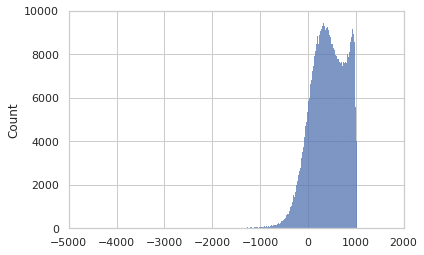

In [11]:
ax = sns.histplot(LL)
ax.set_xlim(-5000., 2000.)
ax.set_ylim(0., 10000.)

(0.0, 200.0)

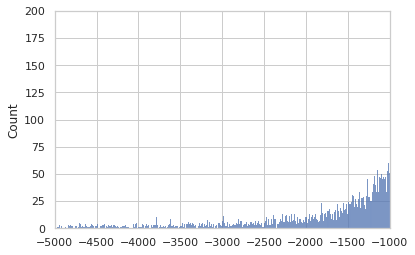

In [12]:
ax = sns.histplot(LL)
ax.set_xlim(-5000., -1000.)
ax.set_ylim(0., 200.)

# Show one

## Aim for -4000

In [13]:
i4000 = np.argmin(np.abs(LL+4000))
i4000

219001

In [15]:
cutout = llc_table.iloc[i4000]
cutout

lat                                                          -29.9971
lon                                                           74.8854
row                                                              6249
col                                                              5386
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              20.5525
Tmin                                                           19.154
Tmax                                                           21.679
T90                                                            21.185
T10                                                            19.829
Name: 219001, dtype:

In [17]:
type(cutout.name)

int

In [18]:
type(cutout)

pandas.core.series.Series

## PreProc

In [35]:
img, pp_hf = llc_io.grab_image(cutout, close=False)

In [25]:
pp_hf.close()

## Show

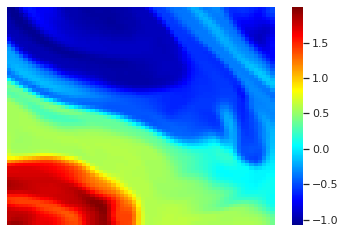

In [36]:
pal, cm = plotting.load_palette()
ax = sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

In [37]:
img2 = pp_hf['valid'][i4000, 0, ...]

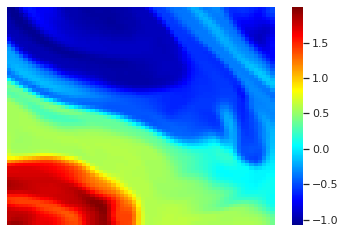

In [38]:
pal, cm = plotting.load_palette()
ax = sns.heatmap(img2, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

----

# Debugin

In [43]:
pp_file = 's3://llc/PreProc/LLC_uniform_test_preproc.h5'

In [44]:
pp_hf.close()

In [45]:
f=ulmo_io.open(pp_file, 'rb')
pp_hf = h5py.File(f, 'r')

In [46]:
img3 = pp_hf['valid'][i4000, 0, ...]

<AxesSubplot:>

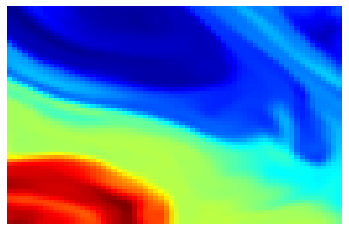

In [47]:
pal, cm = plotting.load_palette()
sns.heatmap(img3, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=False)

In [29]:
i4000

219001

## Local

In [30]:
pp_file_local = '/data/Projects/Oceanography/AI/OOD/LLC/PreProc/LLC_uniform_preproc_test.h5'

In [33]:
with ulmo_io.open(pp_file_local, 'rb') as f:
    pp_hf_l = h5py.File(f, 'r')
    img_l = pp_hf_l['valid'][i4000, 0, ...]

<AxesSubplot:>

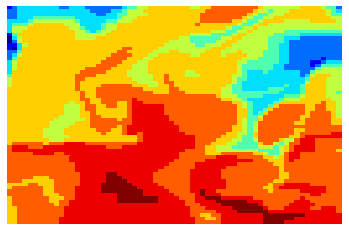

In [34]:
pal, cm = plotting.load_palette()
sns.heatmap(img_l, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=False)

## Correct answer

In [54]:
sdate = str(cutout.datetime).replace(':','_')[:19]
sdate

'2011-11-30 00_00_00'

In [58]:
sdate[10] = 'T'

TypeError: 'str' object does not support item assignment

In [62]:
reload(llc_io)
dfile = llc_io.grab_llc_datafile(cutout.datetime, local=True)
dfile

'/data/Projects/Oceanography/data/LLC/ThetaUVSalt/LLC4320_2011-11-30T00_00_00.nc'

In [65]:
ds = xarray.open_dataset(dfile)
ds

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 ...
    U        (j, i_g) float32 ...
    V        (j_g, i) float32 ...
    W        (k_l, j, i) float32 ...
    Salt     (j, i) float32 ...

In [66]:
sst = ds.Theta.values

In [69]:
sst.shape

(12960, 17280)

In [70]:
cutout

lat                                                          -29.9971
lon                                                           74.8854
row                                                              6249
col                                                              5386
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              20.5525
Tmin                                                           19.154
Tmax                                                           21.679
T90                                                            21.185
T10                                                            19.829
Name: 219001, dtype:

In [67]:
img7 = sst[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
img7.shape

(64, 64)

<AxesSubplot:>

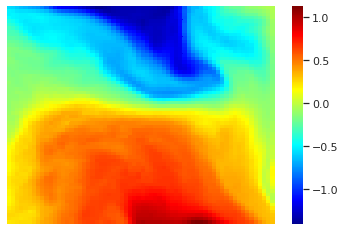

In [72]:
pal, cm = plotting.load_palette()
sns.heatmap(img7-np.mean(img7), xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Local Preproc

In [73]:
local_pp = '/data/Projects/Oceanography/AI/OOD/LLC/PreProc/LLC_uniform_test_preproc.h5'

In [74]:
lpp_h5 = h5py.File(local_pp, 'r')

In [75]:
lpp_h5.keys()

<KeysViewHDF5 ['valid', 'valid_metadata']>

In [78]:
meta = lpp_h5['valid_metadata']
df_pp = pandas.DataFrame(meta[:].astype(np.unicode_))#, columns=meta.attrs['columns'])

In [79]:
df_pp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.515810012817383,-49.92708206176758,8867,16675,2012-07-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-07-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,26.77527618408203,26.400001525878906,26.970001220703125,26.916000366210938,26.483001708984375
1,-39.73479461669922,178.2395782470703,5630,10347,2011-09-30 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,12.325772285461426,11.689000129699707,12.921000480651855,12.784000396728516,11.935999870300293
2,-53.96160888671875,-23.65625,4556,656,2012-05-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-05-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.466836452484131,1.3999996185302734,3.8269996643066406,3.36799955368042,1.8379993438720703
3,2.388246774673462,160.65625,8011,9503,2012-03-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,28.45553970336914,28.32000160217285,28.556001663208008,28.511001586914062,28.40300178527832
4,42.21384811401367,151.3020782470703,10315,9054,2011-09-30 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,18.08561134338379,16.880001068115234,19.020999908447266,18.618999481201172,17.26799964904785


In [80]:
df_pp.iloc[i4000]

0                                    -56.25566101074219
1                                    -146.8645782470703
2                                                  4355
3                                                 12022
4                                   2011-09-30 00:00:00
5     s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
6          s3://llc/PreProc/LLC_uniform_test_preproc.h5
7                                               llc_std
8                                                    64
9                                 -0.014142334461212158
10                                   -1.082000732421875
11                                    1.984999656677246
12                                    1.371999740600586
13                                  -0.9550008773803711
Name: 219001, dtype: object

In [81]:
meta.attrs['columns']

array(['lat', 'lon', 'row', 'col', 'datetime', 'LLC_file', 'pp_file',
       'pp_root', 'field_size', 'mean_temperature', 'Tmin', 'Tmax', 'T90',
       'T10', 'Tmin', 'Tmax', 'T90', 'T10'], dtype=object)

In [82]:
llc_table.columns

Index(['lat', 'lon', 'row', 'col', 'datetime', 'LLC_file', 'pp_file',
       'pp_root', 'field_size', 'mean_temperature', 'Tmin', 'Tmax', 'T90',
       'T10'],
      dtype='object')